****Neural Network on Merged Data Minimizing Mean Absolute Percentage Error (MAPE)****

In [147]:
#Author: Bryant
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
import keras_tuner as kt

In [148]:
random.seed(12345)

In [149]:
# Importing Data
toyota = pd.read_csv('Merged_Data_with_lag_Lead_Sales.csv', header=0)
toyota.head(20)

,Week,Model,Sales,Region,Website_Visits.Organic.BAT,Website_Visits.Paid.BAT,CTA1.Organic.BAT,CTA1.Paid.BAT,CTA2.Organic.BAT,CTA2.Paid.BAT,...,Impressions.Unknown_Platform.Video,Impressions.NA.Video,Qualified_Actions.Connected_TV.Video,Qualified_Actions.Desktop.Video,Qualified_Actions.Mobile.Video,Qualified_Actions.Unknown_Platform.Video,Qualified_Actions.NA.Video,Week_of_Month,Month_Number,Fin_Year_End
0,2020-10-04,AF,81,Region 1,365,283,343,164,37,6,...,4544,0,0,3792,3184,0,0,1,10,0
1,2020-10-11,AF,84,Region 1,311,303,267,160,5,7,...,2379,0,0,4941,3688,0,0,2,10,0
2,2020-10-18,AF,86,Region 1,165,353,102,297,7,8,...,1405,0,0,5874,4041,0,0,3,10,0
3,2020-10-25,AF,101,Region 1,84,343,73,296,2,11,...,233,0,0,5833,3301,0,0,4,10,0
4,2020-11-01,AF,79,Region 1,89,325,88,295,1,9,...,38,0,0,4671,2645,0,0,1,11,0
5,2020-11-08,AF,68,Region 1,105,321,114,285,5,8,...,150,0,0,5312,3314,0,0,2,11,0
6,2020-11-15,AF,79,Region 1,112,331,108,341,5,11,...,151,0,0,5242,3166,0,0,3,11,0
7,2020-11-22,AF,74,Region 1,84,375,58,297,7,14,...,11,0,0,4272,3209,0,0,4,11,0
8,2020-11-29,AF,81,Region 1,76,280,58,257,5,5,...,1554,0,0,4576,2625,0,0,5,11,0
9,2020-12-06,AF,59,Region 1,69,313,69,263,5,11,...,39969,0,0,4571,3052,0,0,1,12,0


In [150]:
toyota = toyota[toyota.Region != 'Region 13']

In [151]:
toyota.shape

(1500, 99)

In [152]:
toyota.index = pd.to_datetime(toyota['Week'])
toyota = toyota.drop(['Week'], axis= 1)

In [153]:
toyota

,Model,Sales,Region,Website_Visits.Organic.BAT,Website_Visits.Paid.BAT,CTA1.Organic.BAT,CTA1.Paid.BAT,CTA2.Organic.BAT,CTA2.Paid.BAT,Website_Visits.Organic.TCOM,...,Impressions.Unknown_Platform.Video,Impressions.NA.Video,Qualified_Actions.Connected_TV.Video,Qualified_Actions.Desktop.Video,Qualified_Actions.Mobile.Video,Qualified_Actions.Unknown_Platform.Video,Qualified_Actions.NA.Video,Week_of_Month,Month_Number,Fin_Year_End
Week,,,,,,,,,,,,,,,,,,,,,
2020-10-04,AF,81,Region 1,365,283,343,164,37,6,1022,...,4544,0,0,3792,3184,0,0,1,10,0
2020-10-11,AF,84,Region 1,311,303,267,160,5,7,1017,...,2379,0,0,4941,3688,0,0,2,10,0
2020-10-18,AF,86,Region 1,165,353,102,297,7,8,1022,...,1405,0,0,5874,4041,0,0,3,10,0
2020-10-25,AF,101,Region 1,84,343,73,296,2,11,902,...,233,0,0,5833,3301,0,0,4,10,0
2020-11-01,AF,79,Region 1,89,325,88,295,1,9,1049,...,38,0,0,4671,2645,0,0,1,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-21,AW,116,Region 9,52,124,43,110,1,4,4854,...,124,0,0,518,394,0,0,3,2,0
2021-02-28,AW,141,Region 9,46,105,53,114,1,1,4072,...,97,0,0,579,550,0,0,4,2,0
2021-03-07,AW,151,Region 9,43,96,46,85,0,2,3771,...,75,0,0,451,504,0,0,1,3,1


In [154]:
# Selecting predictor variables
col_list = ['Sales','Model','Region','Website_Visits.Paid.BAT','CTA1.Paid.BAT','CTA2.Paid.BAT','Website_Visits.Paid.TCOM','CTA1.Organic.TCOM','CTA1.Paid.TCOM',
            'CTA2.Organic.TCOM','CTA2.Paid.TCOM','Lead_Sales.Category_7','Lead_Sales.Category_5','Lead_Sales.Category_1','Lead_Sales.Category_6','Lead_Sales.Category_4',
            'Lead_Sales.Category_9','Lead_Sales.Category_7_lag1','Lead_Sales.Category_7_lag4','Lead_Sales.Category_5_lag1','Lead_Sales.Category_5_lag4','Lead_Sales.Category_4_lag1',
            'Lead_Sales.Category_4_lag2','Lead_Sales.Category_4_lag3','Lead_Sales.Category_4_lag4','Lead_Sales.Category_9_lag2','Impressions.Connected_TV.Display',
            'Impressions.Desktop.Display','Impressions.Mobile.Display','Qualified_Actions.Mobile.Display','Qualified_Actions.NA.Search','Qualified_Actions.NA.Social',
            'Impressions.Connected_TV.Video','Impressions.Mobile.Video','Week_of_Month']

In [155]:
toyota = toyota[col_list]

In [156]:
toyota.shape

(1500, 35)

In [157]:
# Variance Inflation Factor (VIF)
def vif_arr(df):
    vif = pd.DataFrame()
    df=sma.add_constant(df)
    vif['variables'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return(vif)

In [158]:
# Dummy Variables for Model
dummies_model = pd.get_dummies(toyota.Model)
dummies_model

,AF,AH,AL,AR,AW
Week,,,,,
2020-10-04,1,0,0,0,0
2020-10-11,1,0,0,0,0
2020-10-18,1,0,0,0,0
2020-10-25,1,0,0,0,0
2020-11-01,1,0,0,0,0
...,...,...,...,...,...
2021-02-21,0,0,0,0,1
2021-02-28,0,0,0,0,1
2021-03-07,0,0,0,0,1


In [159]:
# Dummy Variables for Region (1-12, removing Region 13)
dummies_region = pd.get_dummies(toyota.Region)
dummies_region

,Region 1,Region 10,Region 11,Region 12,Region 2,Region 3,Region 4,Region 5,Region 6,Region 7,Region 8,Region 9
Week,,,,,,,,,,,,
2020-10-04,1,0,0,0,0,0,0,0,0,0,0,0
2020-10-11,1,0,0,0,0,0,0,0,0,0,0,0
2020-10-18,1,0,0,0,0,0,0,0,0,0,0,0
2020-10-25,1,0,0,0,0,0,0,0,0,0,0,0
2020-11-01,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-21,0,0,0,0,0,0,0,0,0,0,0,1
2021-02-28,0,0,0,0,0,0,0,0,0,0,0,1
2021-03-07,0,0,0,0,0,0,0,0,0,0,0,1


In [160]:
# Dummy Variables for Week_of_Month (1-5)
dummies_Week_of_Month = pd.get_dummies(toyota, columns=['Week_of_Month'])
dummies_Week_of_Month = dummies_Week_of_Month.loc[:,'Week_of_Month_1':'Week_of_Month_5']
dummies_Week_of_Month

,Week_of_Month_1,Week_of_Month_2,Week_of_Month_3,Week_of_Month_4,Week_of_Month_5
Week,,,,,
2020-10-04,1,0,0,0,0
2020-10-11,0,1,0,0,0
2020-10-18,0,0,1,0,0
2020-10-25,0,0,0,1,0
2020-11-01,1,0,0,0,0
...,...,...,...,...,...
2021-02-21,0,0,1,0,0
2021-02-28,0,0,0,1,0
2021-03-07,1,0,0,0,0


In [161]:
# # Dummy Variables for Fin_Year_End (1-12)
# dummies_Fin_Year_End = pd.get_dummies(toyota, columns=['Fin_Year_End'])
# dummies_Fin_Year_End = dummies_Fin_Year_End.loc[:,'Fin_Year_End_0':'Fin_Year_End_1']
# dummies_Fin_Year_End

In [162]:
# Replacing old categorical features with dummy variables
newtoyota = pd.concat([toyota,dummies_model,dummies_region,dummies_Week_of_Month],axis='columns')

del newtoyota['Model']
del newtoyota['Region']
del newtoyota['Week_of_Month']
#del newtoyota['Month_Number']
# del newtoyota['Fin_Year_End']

In [163]:
# Filling NA values
newtoyota = newtoyota.fillna(0)

In [164]:
# Checks for empty columns and removes them
newtoyota=newtoyota.loc[:, (newtoyota.sum(axis=0) != 0)]

In [165]:
newtoyota.shape

(1500, 54)

In [166]:
newtoyota.head()

,Sales,Website_Visits.Paid.BAT,CTA1.Paid.BAT,CTA2.Paid.BAT,Website_Visits.Paid.TCOM,CTA1.Organic.TCOM,CTA1.Paid.TCOM,CTA2.Organic.TCOM,CTA2.Paid.TCOM,Lead_Sales.Category_7,...,Region 5,Region 6,Region 7,Region 8,Region 9,Week_of_Month_1,Week_of_Month_2,Week_of_Month_3,Week_of_Month_4,Week_of_Month_5
Week,,,,,,,,,,,,,,,,,,,,,
2020-10-04,81,283,164,6,971,512,399,83,70,0,...,0,0,0,0,0,1,0,0,0,0
2020-10-11,84,303,160,7,973,489,347,72,54,3,...,0,0,0,0,0,0,1,0,0,0
2020-10-18,86,353,297,8,995,480,382,83,59,2,...,0,0,0,0,0,0,0,1,0,0
2020-10-25,101,343,296,11,737,455,244,67,35,1,...,0,0,0,0,0,0,0,0,1,0
2020-11-01,79,325,295,9,515,477,220,56,28,0,...,0,0,0,0,0,1,0,0,0,0


In [167]:
newtoyota.columns

Index(['Sales', 'Website_Visits.Paid.BAT', 'CTA1.Paid.BAT', 'CTA2.Paid.BAT',
       'Website_Visits.Paid.TCOM', 'CTA1.Organic.TCOM', 'CTA1.Paid.TCOM',
       'CTA2.Organic.TCOM', 'CTA2.Paid.TCOM', 'Lead_Sales.Category_7',
       'Lead_Sales.Category_5', 'Lead_Sales.Category_1',
       'Lead_Sales.Category_6', 'Lead_Sales.Category_4',
       'Lead_Sales.Category_9', 'Lead_Sales.Category_7_lag1',
       'Lead_Sales.Category_7_lag4', 'Lead_Sales.Category_5_lag1',
       'Lead_Sales.Category_5_lag4', 'Lead_Sales.Category_4_lag1',
       'Lead_Sales.Category_4_lag2', 'Lead_Sales.Category_4_lag3',
       'Lead_Sales.Category_4_lag4', 'Lead_Sales.Category_9_lag2',
       'Impressions.Connected_TV.Display', 'Impressions.Desktop.Display',
       'Impressions.Mobile.Display', 'Qualified_Actions.Mobile.Display',
       'Qualified_Actions.NA.Search', 'Qualified_Actions.NA.Social',
       'Impressions.Connected_TV.Video', 'Impressions.Mobile.Video', 'AF',
       'AH', 'AL', 'AR', 'AW', 'Region 1', 

In [168]:
# # Checking Data Types, must change objects to numeric
# print(newtoyota.loc[:,'positive_rate':'SP_Close'].dtypes)

In [169]:
newtoyota.columns

Index(['Sales', 'Website_Visits.Paid.BAT', 'CTA1.Paid.BAT', 'CTA2.Paid.BAT',
       'Website_Visits.Paid.TCOM', 'CTA1.Organic.TCOM', 'CTA1.Paid.TCOM',
       'CTA2.Organic.TCOM', 'CTA2.Paid.TCOM', 'Lead_Sales.Category_7',
       'Lead_Sales.Category_5', 'Lead_Sales.Category_1',
       'Lead_Sales.Category_6', 'Lead_Sales.Category_4',
       'Lead_Sales.Category_9', 'Lead_Sales.Category_7_lag1',
       'Lead_Sales.Category_7_lag4', 'Lead_Sales.Category_5_lag1',
       'Lead_Sales.Category_5_lag4', 'Lead_Sales.Category_4_lag1',
       'Lead_Sales.Category_4_lag2', 'Lead_Sales.Category_4_lag3',
       'Lead_Sales.Category_4_lag4', 'Lead_Sales.Category_9_lag2',
       'Impressions.Connected_TV.Display', 'Impressions.Desktop.Display',
       'Impressions.Mobile.Display', 'Qualified_Actions.Mobile.Display',
       'Qualified_Actions.NA.Search', 'Qualified_Actions.NA.Social',
       'Impressions.Connected_TV.Video', 'Impressions.Mobile.Video', 'AF',
       'AH', 'AL', 'AR', 'AW', 'Region 1', 

In [170]:
train = newtoyota 

In [171]:
# Importing Data
val_set = pd.read_csv('Validation_Merged_Data_with_lag_Lead_Sales.csv', header=0)
val_set.head(20)

val_set = val_set[val_set.Region != 'Region 13']

# Selecting predictor variables for Test Set (No Sales)
col_listtest = ['Model','Region','Website_Visits.Paid.BAT','CTA1.Paid.BAT','CTA2.Paid.BAT','Website_Visits.Paid.TCOM','CTA1.Organic.TCOM','CTA1.Paid.TCOM',
            'CTA2.Organic.TCOM','CTA2.Paid.TCOM','Lead_Sales.Category_7','Lead_Sales.Category_5','Lead_Sales.Category_1','Lead_Sales.Category_6','Lead_Sales.Category_4',
            'Lead_Sales.Category_9','Lead_Sales.Category_7_lag1','Lead_Sales.Category_7_lag4','Lead_Sales.Category_5_lag1','Lead_Sales.Category_5_lag4','Lead_Sales.Category_4_lag1',
            'Lead_Sales.Category_4_lag2','Lead_Sales.Category_4_lag3','Lead_Sales.Category_4_lag4','Lead_Sales.Category_9_lag2','Impressions.Connected_TV.Display',
            'Impressions.Desktop.Display','Impressions.Mobile.Display','Qualified_Actions.Mobile.Display','Qualified_Actions.NA.Search','Qualified_Actions.NA.Social',
            'Impressions.Connected_TV.Video','Impressions.Mobile.Video','Week_of_Month']

val_set.index = pd.to_datetime(val_set['Week'])
val_set = val_set.drop(['Week'], axis= 1)
val_set  = val_set[col_listtest]

# Dummy Variables for Model
dummies_modeltest = pd.get_dummies(val_set.Model)
dummies_modeltest
# Dummy Variables for Region (1-12, removing Region 13)
dummies_regiontest = pd.get_dummies(val_set.Region)
dummies_regiontest
# Dummy Variables for Week_of_Month (1-5)
dummies_Week_of_Monthtest = pd.get_dummies(val_set, columns=['Week_of_Month'])
dummies_Week_of_Monthtest = dummies_Week_of_Monthtest.loc[:,'Week_of_Month_1':'Week_of_Month_5']
dummies_Week_of_Monthtest
# Dummy Variables for Fin_Year_End (1-12)
# dummies_Fin_Year_Endtest = pd.get_dummies(val_set, columns=['Fin_Year_End'])
# dummies_Fin_Year_Endtest = dummies_Fin_Year_Endtest.loc[:,'Fin_Year_End_0':'Fin_Year_End_1']
# dummies_Fin_Year_Endtest


# Replacing old categorical features with dummy variables
test = pd.concat([val_set,dummies_modeltest,dummies_regiontest,dummies_Week_of_Monthtest],axis='columns')

del test['Model']
del test['Region']
del test['Week_of_Month']
# del test['Fin_Year_End']
# Filling NA values
test = test.fillna(0)

# Checks for empty columns and removes them
test=test.loc[:, (test.sum(axis=0) != 0)]

test.head()

,Website_Visits.Paid.BAT,CTA1.Paid.BAT,CTA2.Paid.BAT,Website_Visits.Paid.TCOM,CTA1.Organic.TCOM,CTA1.Paid.TCOM,CTA2.Organic.TCOM,CTA2.Paid.TCOM,Lead_Sales.Category_7,Lead_Sales.Category_5,...,Region 5,Region 6,Region 7,Region 8,Region 9,Week_of_Month_1,Week_of_Month_2,Week_of_Month_3,Week_of_Month_4,Week_of_Month_5
Week,,,,,,,,,,,,,,,,,,,,,
2020-10-04,283,164,6,971,512,399,83,70,0,2,...,0,0,0,0,0,1,0,0,0,0
2020-10-11,303,160,7,973,489,347,72,54,3,2,...,0,0,0,0,0,0,1,0,0,0
2020-10-18,353,297,8,995,480,382,83,59,2,1,...,0,0,0,0,0,0,0,1,0,0
2020-10-25,343,296,11,737,455,244,67,35,1,1,...,0,0,0,0,0,0,0,0,1,0
2020-11-01,325,295,9,515,477,220,56,28,0,0,...,0,0,0,0,0,1,0,0,0,0


In [172]:
test.shape

(2220, 53)

In [173]:
train.shape

(1500, 54)

In [174]:
train.columns

Index(['Sales', 'Website_Visits.Paid.BAT', 'CTA1.Paid.BAT', 'CTA2.Paid.BAT',
       'Website_Visits.Paid.TCOM', 'CTA1.Organic.TCOM', 'CTA1.Paid.TCOM',
       'CTA2.Organic.TCOM', 'CTA2.Paid.TCOM', 'Lead_Sales.Category_7',
       'Lead_Sales.Category_5', 'Lead_Sales.Category_1',
       'Lead_Sales.Category_6', 'Lead_Sales.Category_4',
       'Lead_Sales.Category_9', 'Lead_Sales.Category_7_lag1',
       'Lead_Sales.Category_7_lag4', 'Lead_Sales.Category_5_lag1',
       'Lead_Sales.Category_5_lag4', 'Lead_Sales.Category_4_lag1',
       'Lead_Sales.Category_4_lag2', 'Lead_Sales.Category_4_lag3',
       'Lead_Sales.Category_4_lag4', 'Lead_Sales.Category_9_lag2',
       'Impressions.Connected_TV.Display', 'Impressions.Desktop.Display',
       'Impressions.Mobile.Display', 'Qualified_Actions.Mobile.Display',
       'Qualified_Actions.NA.Search', 'Qualified_Actions.NA.Social',
       'Impressions.Connected_TV.Video', 'Impressions.Mobile.Video', 'AF',
       'AH', 'AL', 'AR', 'AW', 'Region 1', 

In [175]:
test.columns

Index(['Website_Visits.Paid.BAT', 'CTA1.Paid.BAT', 'CTA2.Paid.BAT',
       'Website_Visits.Paid.TCOM', 'CTA1.Organic.TCOM', 'CTA1.Paid.TCOM',
       'CTA2.Organic.TCOM', 'CTA2.Paid.TCOM', 'Lead_Sales.Category_7',
       'Lead_Sales.Category_5', 'Lead_Sales.Category_1',
       'Lead_Sales.Category_6', 'Lead_Sales.Category_4',
       'Lead_Sales.Category_9', 'Lead_Sales.Category_7_lag1',
       'Lead_Sales.Category_7_lag4', 'Lead_Sales.Category_5_lag1',
       'Lead_Sales.Category_5_lag4', 'Lead_Sales.Category_4_lag1',
       'Lead_Sales.Category_4_lag2', 'Lead_Sales.Category_4_lag3',
       'Lead_Sales.Category_4_lag4', 'Lead_Sales.Category_9_lag2',
       'Impressions.Connected_TV.Display', 'Impressions.Desktop.Display',
       'Impressions.Mobile.Display', 'Qualified_Actions.Mobile.Display',
       'Qualified_Actions.NA.Search', 'Qualified_Actions.NA.Social',
       'Impressions.Connected_TV.Video', 'Impressions.Mobile.Video', 'AF',
       'AH', 'AL', 'AR', 'AW', 'Region 1', 'Region 1

In [176]:
# Correlation Matrix for Continuous Variables
correlation_matrix = train.loc[:,'Sales':'Impressions.Mobile.Video'].corr()
correlation_matrix

,Sales,Website_Visits.Paid.BAT,CTA1.Paid.BAT,CTA2.Paid.BAT,Website_Visits.Paid.TCOM,CTA1.Organic.TCOM,CTA1.Paid.TCOM,CTA2.Organic.TCOM,CTA2.Paid.TCOM,Lead_Sales.Category_7,...,Lead_Sales.Category_4_lag4,Lead_Sales.Category_9_lag2,Impressions.Connected_TV.Display,Impressions.Desktop.Display,Impressions.Mobile.Display,Qualified_Actions.Mobile.Display,Qualified_Actions.NA.Search,Qualified_Actions.NA.Social,Impressions.Connected_TV.Video,Impressions.Mobile.Video
Sales,1.000000,0.055708,-0.038721,0.073784,0.636143,0.324973,0.196112,0.185930,0.212781,0.263924,...,-0.013808,0.068705,-0.005240,0.147122,0.107561,0.190788,0.302306,-0.053917,0.065777,0.073379
Website_Visits.Paid.BAT,0.055708,1.000000,0.565786,0.456776,0.088140,0.018006,-0.064658,0.346942,0.331007,-0.024045,...,0.025032,0.003844,0.081725,0.043486,0.013254,-0.005910,0.162426,0.059493,-0.021912,-0.041888
CTA1.Paid.BAT,-0.038721,0.565786,1.000000,0.549237,-0.018435,0.054831,-0.032805,0.322466,0.296397,0.082699,...,0.045985,0.098778,0.121424,0.033862,-0.005150,-0.025442,0.178421,0.170024,0.061672,0.027456
CTA2.Paid.BAT,0.073784,0.456776,0.549237,1.000000,0.066531,0.036083,-0.032747,0.284981,0.296724,-0.162136,...,-0.023856,0.092973,0.030725,0.133753,0.106374,0.141481,0.242254,0.039772,0.091724,0.076838
Website_Visits.Paid.TCOM,0.636143,0.088140,-0.018435,0.066531,1.000000,0.604411,0.565030,0.538575,0.590593,0.420351,...,0.020004,0.005258,0.191100,0.175378,0.109308,0.138462,0.604016,0.211380,-0.010937,0.024160
CTA1.Organic.TCOM,0.324973,0.018006,0.054831,0.036083,0.604411,1.000000,0.406931,0.582078,0.542368,0.482942,...,0.039426,0.061021,0.243180,0.093874,0.047319,-0.030934,0.292109,0.331646,-0.012648,-0.001574
CTA1.Paid.TCOM,0.196112,-0.064658,-0.032805,-0.032747,0.565030,0.406931,1.000000,0.363454,0.400494,0.480008,...,-0.030724,0.028290,0.197748,0.160218,0.093838,0.057758,0.310292,0.221624,0.070244,0.070674
CTA2.Organic.TCOM,0.185930,0.346942,0.322466,0.284981,0.538575,0.582078,0.363454,1.000000,0.958494,0.280467,...,0.047083,-0.036267,0.250646,0.153045,0.097183,0.045220,0.372428,0.273980,0.075383,0.065357
CTA2.Paid.TCOM,0.212781,0.331007,0.296397,0.296724,0.590593,0.542368,0.400494,0.958494,1.000000,0.281415,...,0.035836,-0.026976,0.224218,0.170203,0.095457,0.073922,0.464249,0.275897,0.129253,0.094442
Lead_Sales.Category_7,0.263924,-0.024045,0.082699,-0.162136,0.420351,0.482942,0.480008,0.280467,0.281415,1.000000,...,0.073882,0.047944,0.215129,0.101062,0.047463,-0.000813,0.315870,0.233732,0.063441,0.029530


In [177]:
abscorr = correlation_matrix.iloc[correlation_matrix.Sales.abs().argsort()]

In [178]:
abscorr.sort_values('Sales', ascending=False, axis=0)

,Sales,Website_Visits.Paid.BAT,CTA1.Paid.BAT,CTA2.Paid.BAT,Website_Visits.Paid.TCOM,CTA1.Organic.TCOM,CTA1.Paid.TCOM,CTA2.Organic.TCOM,CTA2.Paid.TCOM,Lead_Sales.Category_7,...,Lead_Sales.Category_4_lag4,Lead_Sales.Category_9_lag2,Impressions.Connected_TV.Display,Impressions.Desktop.Display,Impressions.Mobile.Display,Qualified_Actions.Mobile.Display,Qualified_Actions.NA.Search,Qualified_Actions.NA.Social,Impressions.Connected_TV.Video,Impressions.Mobile.Video
Sales,1.000000,0.055708,-0.038721,0.073784,0.636143,0.324973,0.196112,0.185930,0.212781,0.263924,...,-0.013808,0.068705,-0.005240,0.147122,0.107561,0.190788,0.302306,-0.053917,0.065777,0.073379
Website_Visits.Paid.TCOM,0.636143,0.088140,-0.018435,0.066531,1.000000,0.604411,0.565030,0.538575,0.590593,0.420351,...,0.020004,0.005258,0.191100,0.175378,0.109308,0.138462,0.604016,0.211380,-0.010937,0.024160
CTA1.Organic.TCOM,0.324973,0.018006,0.054831,0.036083,0.604411,1.000000,0.406931,0.582078,0.542368,0.482942,...,0.039426,0.061021,0.243180,0.093874,0.047319,-0.030934,0.292109,0.331646,-0.012648,-0.001574
Qualified_Actions.NA.Search,0.302306,0.162426,0.178421,0.242254,0.604016,0.292109,0.310292,0.372428,0.464249,0.315870,...,0.120271,0.059925,0.167445,0.085082,-0.011083,0.131082,1.000000,-0.009766,-0.016962,-0.038270
Lead_Sales.Category_7,0.263924,-0.024045,0.082699,-0.162136,0.420351,0.482942,0.480008,0.280467,0.281415,1.000000,...,0.073882,0.047944,0.215129,0.101062,0.047463,-0.000813,0.315870,0.233732,0.063441,0.029530
Lead_Sales.Category_7_lag1,0.258638,-0.020689,0.079655,-0.162538,0.398348,0.461620,0.421466,0.265900,0.260833,0.706461,...,0.068683,0.038542,0.156342,0.057965,-0.002262,-0.042709,0.302447,0.218839,0.012904,-0.000536
CTA2.Paid.TCOM,0.212781,0.331007,0.296397,0.296724,0.590593,0.542368,0.400494,0.958494,1.000000,0.281415,...,0.035836,-0.026976,0.224218,0.170203,0.095457,0.073922,0.464249,0.275897,0.129253,0.094442
Lead_Sales.Category_1,0.196403,0.029994,0.086664,-0.128785,0.378643,0.434941,0.392537,0.279387,0.264794,0.654261,...,0.084894,0.013940,0.243406,0.047354,-0.011365,-0.084969,0.331329,0.170934,0.004350,-0.020309
CTA1.Paid.TCOM,0.196112,-0.064658,-0.032805,-0.032747,0.565030,0.406931,1.000000,0.363454,0.400494,0.480008,...,-0.030724,0.028290,0.197748,0.160218,0.093838,0.057758,0.310292,0.221624,0.070244,0.070674
Lead_Sales.Category_5,0.195610,0.091617,0.285024,0.141696,0.258433,0.284947,0.274080,0.130199,0.136967,0.517726,...,0.061122,0.082011,0.144902,0.107768,0.063627,0.039381,0.366653,0.164645,0.055162,0.049960


In [179]:
# Correlation for Continuous Variables Sorted by Sales Descending
correlation_matrix.sort_values('Sales', ascending=False, axis=0)

,Sales,Website_Visits.Paid.BAT,CTA1.Paid.BAT,CTA2.Paid.BAT,Website_Visits.Paid.TCOM,CTA1.Organic.TCOM,CTA1.Paid.TCOM,CTA2.Organic.TCOM,CTA2.Paid.TCOM,Lead_Sales.Category_7,...,Lead_Sales.Category_4_lag4,Lead_Sales.Category_9_lag2,Impressions.Connected_TV.Display,Impressions.Desktop.Display,Impressions.Mobile.Display,Qualified_Actions.Mobile.Display,Qualified_Actions.NA.Search,Qualified_Actions.NA.Social,Impressions.Connected_TV.Video,Impressions.Mobile.Video
Sales,1.000000,0.055708,-0.038721,0.073784,0.636143,0.324973,0.196112,0.185930,0.212781,0.263924,...,-0.013808,0.068705,-0.005240,0.147122,0.107561,0.190788,0.302306,-0.053917,0.065777,0.073379
Website_Visits.Paid.TCOM,0.636143,0.088140,-0.018435,0.066531,1.000000,0.604411,0.565030,0.538575,0.590593,0.420351,...,0.020004,0.005258,0.191100,0.175378,0.109308,0.138462,0.604016,0.211380,-0.010937,0.024160
CTA1.Organic.TCOM,0.324973,0.018006,0.054831,0.036083,0.604411,1.000000,0.406931,0.582078,0.542368,0.482942,...,0.039426,0.061021,0.243180,0.093874,0.047319,-0.030934,0.292109,0.331646,-0.012648,-0.001574
Qualified_Actions.NA.Search,0.302306,0.162426,0.178421,0.242254,0.604016,0.292109,0.310292,0.372428,0.464249,0.315870,...,0.120271,0.059925,0.167445,0.085082,-0.011083,0.131082,1.000000,-0.009766,-0.016962,-0.038270
Lead_Sales.Category_7,0.263924,-0.024045,0.082699,-0.162136,0.420351,0.482942,0.480008,0.280467,0.281415,1.000000,...,0.073882,0.047944,0.215129,0.101062,0.047463,-0.000813,0.315870,0.233732,0.063441,0.029530
Lead_Sales.Category_7_lag1,0.258638,-0.020689,0.079655,-0.162538,0.398348,0.461620,0.421466,0.265900,0.260833,0.706461,...,0.068683,0.038542,0.156342,0.057965,-0.002262,-0.042709,0.302447,0.218839,0.012904,-0.000536
CTA2.Paid.TCOM,0.212781,0.331007,0.296397,0.296724,0.590593,0.542368,0.400494,0.958494,1.000000,0.281415,...,0.035836,-0.026976,0.224218,0.170203,0.095457,0.073922,0.464249,0.275897,0.129253,0.094442
Lead_Sales.Category_1,0.196403,0.029994,0.086664,-0.128785,0.378643,0.434941,0.392537,0.279387,0.264794,0.654261,...,0.084894,0.013940,0.243406,0.047354,-0.011365,-0.084969,0.331329,0.170934,0.004350,-0.020309
CTA1.Paid.TCOM,0.196112,-0.064658,-0.032805,-0.032747,0.565030,0.406931,1.000000,0.363454,0.400494,0.480008,...,-0.030724,0.028290,0.197748,0.160218,0.093838,0.057758,0.310292,0.221624,0.070244,0.070674
Lead_Sales.Category_5,0.195610,0.091617,0.285024,0.141696,0.258433,0.284947,0.274080,0.130199,0.136967,0.517726,...,0.061122,0.082011,0.144902,0.107768,0.063627,0.039381,0.366653,0.164645,0.055162,0.049960


In [180]:
# Pairplots
# sns.pairplot(train[['Sales', 'Qualified_Actions.Mobile.Display', 'Qualified_Actions.NA.Social', 'Lead_Sales.Category_7_lag1', 'Lead_Sales.Category_5', 'CTA2.Paid.BAT', 
#             'Impressions.Connected_TV.Video', 'Impressions.Mobile.Video', 'Impressions.Connected_TV.Display', 'Lead_Sales.Category_5_lag4', 'Lead_Sales.Category_7_lag2', 
#             'Lead_Sales.Category_7', 'Website_Visits.Paid.BAT','Website_Visits.Organic.BAT','Lead_Sales.Category_5_lag1','Qualified_Actions.Mobile.Video', 
#             'Impressions.Desktop.Display', 'Impressions.Mobile.Display', 'Impressions.NA.Search', 'Impressions.Unknown_Platform.Video', 'Lead_Sales.Category_7_lag4', 
#             'Lead_Sales.Category_8_lag1', 'Lead_Sales.Category_9', 'Lead_Sales.Category_9_lag4']], diag_kind='kde')

In [181]:
# Statistics of Training Data
trainstat = train.describe()
trainstat.pop('Sales')
trainstat = trainstat.transpose()
trainstat = trainstat.loc['Website_Visits.Paid.BAT':'Impressions.Mobile.Video',:]

In [182]:
# Response Variable
trainlabel = train.pop('Sales')
#testlabel = test.pop('Sales')

In [183]:
# Normalization
def normalize(x):
    return(x- trainstat['mean']) / trainstat['std']
norm_train = normalize(train.loc[:,'Website_Visits.Paid.BAT':'Impressions.Mobile.Video'])
norm_test = normalize(test.loc[:,'Website_Visits.Paid.BAT':'Impressions.Mobile.Video'])

In [184]:
trainlabel

Week
2020-10-04     81
2020-10-11     84
2020-10-18     86
2020-10-25    101
2020-11-01     79
             ... 
2021-02-21    116
2021-02-28    141
2021-03-07    151
2021-03-14    146
2021-03-21    136
Name: Sales, Length: 1500, dtype: int64

In [185]:
norm_train.head(5)

,Website_Visits.Paid.BAT,CTA1.Paid.BAT,CTA2.Paid.BAT,Website_Visits.Paid.TCOM,CTA1.Organic.TCOM,CTA1.Paid.TCOM,CTA2.Organic.TCOM,CTA2.Paid.TCOM,Lead_Sales.Category_7,Lead_Sales.Category_5,...,Lead_Sales.Category_4_lag4,Lead_Sales.Category_9_lag2,Impressions.Connected_TV.Display,Impressions.Desktop.Display,Impressions.Mobile.Display,Qualified_Actions.Mobile.Display,Qualified_Actions.NA.Search,Qualified_Actions.NA.Social,Impressions.Connected_TV.Video,Impressions.Mobile.Video
Week,,,,,,,,,,,,,,,,,,,,,
2020-10-04,-0.233970,-0.216772,0.113106,-1.092301,-0.860109,-0.708414,-0.702060,-0.560676,-1.172922,-0.358037,...,-0.247187,-0.132768,0.041886,3.424993,3.219898,2.710424,-0.668002,0.897241,0.814099,1.020981
2020-10-11,-0.185968,-0.231084,0.282597,-1.090700,-0.881804,-0.761662,-0.790345,-0.727090,-0.286732,-0.358037,...,-0.247187,-0.132768,2.134159,3.219672,2.761641,3.218304,-0.716964,1.518448,1.341457,1.885265
2020-10-18,-0.065961,0.259097,0.452087,-1.073093,-0.890293,-0.725822,-0.702060,-0.675085,-0.582128,-0.810866,...,-0.247187,-0.132768,1.562787,4.154925,3.915972,3.380997,-0.727687,1.590461,1.522025,2.481946
2020-10-25,-0.089962,0.255519,0.960558,-1.279583,-0.913875,-0.867133,-0.830475,-0.924706,-0.877525,-0.810866,...,-0.247187,-0.132768,-0.034704,2.039206,2.215523,2.670540,-0.850194,-0.478839,-0.447392,-0.262295
2020-11-01,-0.133165,0.251941,0.621577,-1.457260,-0.893123,-0.891708,-0.918760,-0.997512,-1.172922,-1.263694,...,-0.247187,-0.132768,-0.194844,1.055175,0.821195,2.086335,-0.865166,-1.587397,-0.896495,-0.796265


In [186]:
# Adding the categorical variables back into the training data.
norm_train = pd.concat([norm_train,train.loc[:,'AF':]],axis='columns')
norm_test = pd.concat([norm_test,test.loc[:,'AF':]],axis='columns')

In [187]:
norm_train.head(5)

,Website_Visits.Paid.BAT,CTA1.Paid.BAT,CTA2.Paid.BAT,Website_Visits.Paid.TCOM,CTA1.Organic.TCOM,CTA1.Paid.TCOM,CTA2.Organic.TCOM,CTA2.Paid.TCOM,Lead_Sales.Category_7,Lead_Sales.Category_5,...,Region 5,Region 6,Region 7,Region 8,Region 9,Week_of_Month_1,Week_of_Month_2,Week_of_Month_3,Week_of_Month_4,Week_of_Month_5
Week,,,,,,,,,,,,,,,,,,,,,
2020-10-04,-0.233970,-0.216772,0.113106,-1.092301,-0.860109,-0.708414,-0.702060,-0.560676,-1.172922,-0.358037,...,0,0,0,0,0,1,0,0,0,0
2020-10-11,-0.185968,-0.231084,0.282597,-1.090700,-0.881804,-0.761662,-0.790345,-0.727090,-0.286732,-0.358037,...,0,0,0,0,0,0,1,0,0,0
2020-10-18,-0.065961,0.259097,0.452087,-1.073093,-0.890293,-0.725822,-0.702060,-0.675085,-0.582128,-0.810866,...,0,0,0,0,0,0,0,1,0,0
2020-10-25,-0.089962,0.255519,0.960558,-1.279583,-0.913875,-0.867133,-0.830475,-0.924706,-0.877525,-0.810866,...,0,0,0,0,0,0,0,0,1,0
2020-11-01,-0.133165,0.251941,0.621577,-1.457260,-0.893123,-0.891708,-0.918760,-0.997512,-1.172922,-1.263694,...,0,0,0,0,0,1,0,0,0,0


In [188]:
# Building Neural Network with Hyperparameter Tuning
def buildmodel(hp):
    nn = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        nn.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
    nn.add(layers.Dense(1, activation='linear'))
    nn.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2,1e-3,1e-4])),
        loss='mape',
        metrics=['mae', 'mape','mse'])
    return nn

In [189]:
tuner = kt.RandomSearch(buildmodel, objective = 'val_mape', max_trials = 10, executions_per_trial = 3, directory='finaltuning',project_name='last_to2')

In [190]:
# Patience is amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor ='val_loss', patience=10)

In [191]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [192]:
tuner.search(norm_train, trainlabel, epochs=50, validation_split=0.2, callbacks=[early_stop])

Trial 10 Complete [00h 00m 08s]
val_mape: 26.918223698933918

Best val_mape So Far: 23.463795979817707
Total elapsed time: 00h 01m 53s
INFO:tensorflow:Oracle triggered exit


In [193]:
tuner.results_summary()

Results summary
Results in finaltuning\last_to2
Showing 10 best trials
Objective(name='val_mape', direction='min')
Trial summary
Hyperparameters:
num_layers: 16
units_0: 352
units_1: 352
learning_rate: 0.01
units_2: 224
units_3: 224
units_4: 96
units_5: 416
units_6: 224
units_7: 256
units_8: 288
units_9: 352
units_10: 64
units_11: 416
units_12: 32
units_13: 32
units_14: 32
units_15: 32
Score: 23.463795979817707
Trial summary
Hyperparameters:
num_layers: 13
units_0: 256
units_1: 128
learning_rate: 0.01
units_2: 160
units_3: 128
units_4: 448
units_5: 96
units_6: 320
units_7: 416
units_8: 32
units_9: 192
units_10: 64
units_11: 32
units_12: 96
units_13: 64
units_14: 192
units_15: 192
Score: 24.970311482747395
Trial summary
Hyperparameters:
num_layers: 7
units_0: 32
units_1: 256
learning_rate: 0.01
units_2: 480
units_3: 256
units_4: 192
units_5: 32
units_6: 288
units_7: 96
units_8: 96
units_9: 448
units_10: 480
units_11: 480
units_12: 416
units_13: 352
units_14: 32
units_15: 320
Score: 26.9

In [194]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps

def buildmodel():
    nn =keras.Sequential([
        layers.Dense(512, activation=tf.nn.relu, input_shape=[len(train.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    nn.compile(loss='mape',optimizer = optimizer,metrics=['mae', 'mape','mse'])
    return nn
nn = buildmodel()

nn.summary()

In [195]:
# Prints dots to show completion of one epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

**Finding the optimal number of epochs to train the model with the hyperparameters**

In [196]:
#Build best model with optimal hyperparameters
model = tuner.hypermodel.build(best_hps)      
history = model.fit(norm_train, trainlabel, epochs=50, validation_split = 0.2, callbacks =[PrintDot()])

val_mape_per_epoch = history.history['val_mape']
best_epoch = val_mape_per_epoch.index(min(val_mape_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
38/38 [==============================] - 1s 9ms/step - loss: 95.9880 - mae: 220.3611 - mape: 95.9880 - mse: 91475.5703 - val_loss: 95.8913 - val_mae: 200.7367 - val_mape: 95.8913 - val_mse: 54244.9453

.Epoch 2/50
38/38 [==============================] - 0s 5ms/step - loss: 57.9460 - mae: 145.4365 - mape: 57.9460 - mse: 48578.3828 - val_loss: 49.2210 - val_mae: 95.3855 - val_mape: 49.2210 - val_mse: 17713.0781
.Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 26.6680 - mae: 69.2793 - mape: 26.6680 - mse: 15867.8730 - val_loss: 34.0914 - val_mae: 57.4871 - val_mape: 34.0914 - val_mse: 5914.7798
.Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 22.3361 - mae: 54.4384 - mape: 22.3361 - mse: 7954.2075 - val_loss: 75.7835 - val_mae: 134.7710 - val_mape: 75.7835 - val_mse: 28958.9141
.Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 22.4939 - mae: 54.5247 - mape: 22.4939 - mse: 8081.2832 - val_loss: 55.5900 - val

In [197]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(norm_train, trainlabel, epochs=best_epoch, validation_split = 0.2)

Epoch 1/45
38/38 [==============================] - 1s 10ms/step - loss: 99.1076 - mae: 211.1936 - mape: 99.1076 - mse: 79019.8984 - val_loss: 36.9274 - val_mae: 75.4462 - val_mape: 36.9274 - val_mse: 14855.9316
Epoch 2/45
38/38 [==============================] - 0s 5ms/step - loss: 37.8644 - mae: 99.7229 - mape: 37.8644 - mse: 28793.0703 - val_loss: 29.2165 - val_mae: 63.2480 - val_mape: 29.2165 - val_mse: 10092.7998
Epoch 3/45
38/38 [==============================] - 0s 5ms/step - loss: 28.4518 - mae: 75.8141 - mape: 28.4518 - mse: 17510.6348 - val_loss: 79.7238 - val_mae: 135.2259 - val_mape: 79.7238 - val_mse: 28167.6875
Epoch 4/45
38/38 [==============================] - 0s 5ms/step - loss: 24.2725 - mae: 60.1955 - mape: 24.2725 - mse: 9748.5342 - val_loss: 42.2225 - val_mae: 68.9391 - val_mape: 42.2225 - val_mse: 8617.6436
Epoch 5/45
38/38 [==============================] - 0s 5ms/step - loss: 19.4021 - mae: 45.0471 - mape: 19.4021 - mse: 5164.8027 - val_loss: 50.3607 - val_mae: 

In [198]:
hypermodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 352)               19008     
_________________________________________________________________
dense_1 (Dense)              (None, 352)               124256    
_________________________________________________________________
dense_2 (Dense)              (None, 224)               79072     
_________________________________________________________________
dense_3 (Dense)              (None, 224)               50400     
_________________________________________________________________
dense_4 (Dense)              (None, 96)                21600     
_________________________________________________________________
dense_5 (Dense)              (None, 416)               40352     
_________________________________________________________________
dense_6 (Dense)              (None, 224)               9

In [199]:
#Training Results
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mae,mape,mse,val_loss,val_mae,val_mape,val_mse,epoch
0,95.987991,220.361115,95.987991,91475.570312,95.891273,200.736710,95.891273,54244.945312,0
1,57.945988,145.436493,57.945988,48578.382812,49.221008,95.385490,49.221008,17713.078125,1
2,26.667963,69.279320,26.667963,15867.873047,34.091400,57.487091,34.091400,5914.779785,2
3,22.336111,54.438389,22.336111,7954.207520,75.783493,134.770950,75.783493,28958.914062,3
4,22.493858,54.524719,22.493858,8081.283203,55.589966,99.946800,55.589966,17564.679688,4


In [200]:
hist.tail()

,loss,mae,mape,mse,val_loss,val_mae,val_mape,val_mse,epoch
45,11.088648,25.269035,11.088648,1517.225952,56.070984,107.097580,56.070984,21436.376953,45
46,8.717377,19.858166,8.717377,1016.597717,48.815697,94.571693,48.815697,17440.107422,46
47,9.098846,20.367609,9.098846,1101.726318,36.948452,67.175026,36.948452,8918.980469,47
48,8.141988,19.542301,8.141988,1025.287964,39.653599,76.757782,39.653599,12001.122070,48
49,7.883096,18.497356,7.883096,927.375732,49.569088,93.064339,49.569088,17151.720703,49


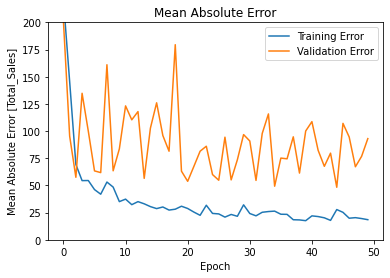

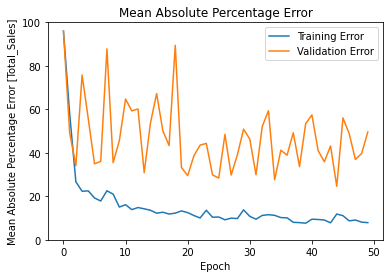

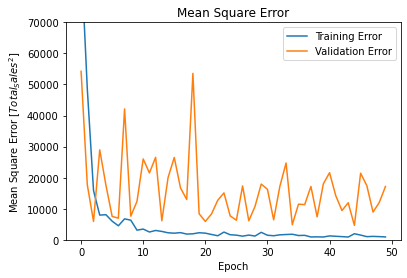

In [201]:
# Plotting KPI metrics
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error [Total_Sales]')
    plt.plot(hist['epoch'], hist['mae'],label='Training Error')
    plt.plot(hist['epoch'], hist['val_mae'],label='Validation Error')
    plt.legend()
    plt.title('Mean Absolute Error')
    plt.ylim([0,200])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Percentage Error [Total_Sales]')
    plt.plot(hist['epoch'], hist['mape'],label='Training Error')
    plt.plot(hist['epoch'], hist['val_mape'],label='Validation Error')
    plt.legend()
    plt.title('Mean Absolute Percentage Error')
    plt.ylim([0,100])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Total_Sales^2$]')
    plt.plot(hist['epoch'], hist['mse'],label='Training Error')
    plt.plot(hist['epoch'], hist['val_mse'],label='Validation Error')
    plt.legend()
    plt.title('Mean Square Error')
    plt.ylim([0,70000])
    

    
plot_history(history)

**The plots shows absolute error increasing for validation error. This is an example of overfitting.**

In [202]:
norm_test

,Website_Visits.Paid.BAT,CTA1.Paid.BAT,CTA2.Paid.BAT,Website_Visits.Paid.TCOM,CTA1.Organic.TCOM,CTA1.Paid.TCOM,CTA2.Organic.TCOM,CTA2.Paid.TCOM,Lead_Sales.Category_7,Lead_Sales.Category_5,...,Region 5,Region 6,Region 7,Region 8,Region 9,Week_of_Month_1,Week_of_Month_2,Week_of_Month_3,Week_of_Month_4,Week_of_Month_5
Week,,,,,,,,,,,,,,,,,,,,,
2020-10-04,-0.233970,-0.216772,0.113106,-1.092301,-0.860109,-0.708414,-0.702060,-0.560676,-1.172922,-0.358037,...,0,0,0,0,0,1,0,0,0,0
2020-10-11,-0.185968,-0.231084,0.282597,-1.090700,-0.881804,-0.761662,-0.790345,-0.727090,-0.286732,-0.358037,...,0,0,0,0,0,0,1,0,0,0
2020-10-18,-0.065961,0.259097,0.452087,-1.073093,-0.890293,-0.725822,-0.702060,-0.675085,-0.582128,-0.810866,...,0,0,0,0,0,0,0,1,0,0
2020-10-25,-0.089962,0.255519,0.960558,-1.279583,-0.913875,-0.867133,-0.830475,-0.924706,-0.877525,-0.810866,...,0,0,0,0,0,0,0,0,1,0
2020-11-01,-0.133165,0.251941,0.621577,-1.457260,-0.893123,-0.891708,-0.918760,-0.997512,-1.172922,-1.263694,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-16,-0.894009,-0.760622,-0.903835,-0.250334,2.736566,-0.214852,6.569432,2.174751,0.304062,-1.263694,...,0,0,0,0,1,0,0,1,0,0
2021-05-23,-0.901209,-0.792824,-0.903835,-0.177502,2.277195,-0.112453,5.967487,2.559583,-0.286732,-0.358037,...,0,0,0,0,1,0,0,0,1,0
2021-05-30,-0.901209,-0.774934,-0.903835,-0.360782,2.432834,-0.155461,7.187428,2.008337,-0.582128,-0.810866,...,0,0,0,0,1,0,0,0,0,1


**Final Predictions**

In [203]:
predictions = hypermodel.predict(norm_test).flatten()

In [204]:
# Reindexing for plot
predictions1 = pd.Series(predictions)

#testlabel1 = testlabel
#testlabel1.index = predictions1.index

In [205]:
test['Sales'] = hypermodel.predict(norm_test)

In [206]:
test

,Website_Visits.Paid.BAT,CTA1.Paid.BAT,CTA2.Paid.BAT,Website_Visits.Paid.TCOM,CTA1.Organic.TCOM,CTA1.Paid.TCOM,CTA2.Organic.TCOM,CTA2.Paid.TCOM,Lead_Sales.Category_7,Lead_Sales.Category_5,...,Region 6,Region 7,Region 8,Region 9,Week_of_Month_1,Week_of_Month_2,Week_of_Month_3,Week_of_Month_4,Week_of_Month_5,Sales
Week,,,,,,,,,,,,,,,,,,,,,
2020-10-04,283,164,6,971,512,399,83,70,0,2,...,0,0,0,0,1,0,0,0,0,76.192848
2020-10-11,303,160,7,973,489,347,72,54,3,2,...,0,0,0,0,0,1,0,0,0,86.214508
2020-10-18,353,297,8,995,480,382,83,59,2,1,...,0,0,0,0,0,0,1,0,0,99.731491
2020-10-25,343,296,11,737,455,244,67,35,1,1,...,0,0,0,0,0,0,0,1,0,99.213142
2020-11-01,325,295,9,515,477,220,56,28,0,0,...,0,0,0,0,1,0,0,0,0,76.751373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-16,8,12,0,2023,4325,881,989,333,5,0,...,0,0,0,1,0,0,1,0,0,381.673676
2021-05-23,5,3,0,2114,3838,981,914,370,3,2,...,0,0,0,1,0,0,0,1,0,362.069824
2021-05-30,5,8,0,1885,4003,939,1066,317,2,1,...,0,0,0,1,0,0,0,0,1,441.487976


In [207]:
cols = list(test.columns)

In [208]:
cols = [cols[-1]] + cols[:-1]

In [209]:
cols

['Sales',
 'Website_Visits.Paid.BAT',
 'CTA1.Paid.BAT',
 'CTA2.Paid.BAT',
 'Website_Visits.Paid.TCOM',
 'CTA1.Organic.TCOM',
 'CTA1.Paid.TCOM',
 'CTA2.Organic.TCOM',
 'CTA2.Paid.TCOM',
 'Lead_Sales.Category_7',
 'Lead_Sales.Category_5',
 'Lead_Sales.Category_1',
 'Lead_Sales.Category_6',
 'Lead_Sales.Category_4',
 'Lead_Sales.Category_9',
 'Lead_Sales.Category_7_lag1',
 'Lead_Sales.Category_7_lag4',
 'Lead_Sales.Category_5_lag1',
 'Lead_Sales.Category_5_lag4',
 'Lead_Sales.Category_4_lag1',
 'Lead_Sales.Category_4_lag2',
 'Lead_Sales.Category_4_lag3',
 'Lead_Sales.Category_4_lag4',
 'Lead_Sales.Category_9_lag2',
 'Impressions.Connected_TV.Display',
 'Impressions.Desktop.Display',
 'Impressions.Mobile.Display',
 'Qualified_Actions.Mobile.Display',
 'Qualified_Actions.NA.Search',
 'Qualified_Actions.NA.Social',
 'Impressions.Connected_TV.Video',
 'Impressions.Mobile.Video',
 'AF',
 'AH',
 'AL',
 'AR',
 'AW',
 'Region 1',
 'Region 10',
 'Region 11',
 'Region 12',
 'Region 2',
 'Region 3',

In [210]:
test = test[cols]

In [211]:
test

,Sales,Website_Visits.Paid.BAT,CTA1.Paid.BAT,CTA2.Paid.BAT,Website_Visits.Paid.TCOM,CTA1.Organic.TCOM,CTA1.Paid.TCOM,CTA2.Organic.TCOM,CTA2.Paid.TCOM,Lead_Sales.Category_7,...,Region 5,Region 6,Region 7,Region 8,Region 9,Week_of_Month_1,Week_of_Month_2,Week_of_Month_3,Week_of_Month_4,Week_of_Month_5
Week,,,,,,,,,,,,,,,,,,,,,
2020-10-04,76.192848,283,164,6,971,512,399,83,70,0,...,0,0,0,0,0,1,0,0,0,0
2020-10-11,86.214508,303,160,7,973,489,347,72,54,3,...,0,0,0,0,0,0,1,0,0,0
2020-10-18,99.731491,353,297,8,995,480,382,83,59,2,...,0,0,0,0,0,0,0,1,0,0
2020-10-25,99.213142,343,296,11,737,455,244,67,35,1,...,0,0,0,0,0,0,0,0,1,0
2020-11-01,76.751373,325,295,9,515,477,220,56,28,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-16,381.673676,8,12,0,2023,4325,881,989,333,5,...,0,0,0,0,1,0,0,1,0,0
2021-05-23,362.069824,5,3,0,2114,3838,981,914,370,3,...,0,0,0,0,1,0,0,0,1,0
2021-05-30,441.487976,5,8,0,1885,4003,939,1066,317,2,...,0,0,0,0,1,0,0,0,0,1


***Formatting Categorical Variables***

In [212]:
test.to_csv('Final_Test_Predictions_toyotaonly.csv')

In [213]:
formatting = pd.read_csv('Final_Test_Predictions_toyotaonly.csv', header=0)
formatting.head(20)
formatting=formatting.rename(columns = {'Unnamed: 0':'Week'})

In [214]:
def undummy(d):
    return d.dot(d.columns)

In [215]:
formatting = formatting.assign(Region=formatting.filter(regex='^Region').pipe(undummy))
formatting = formatting.assign(Week_of_Month=formatting.filter(regex='^Week_of_Month').pipe(undummy))
formatting = formatting.assign(Model=formatting.filter(regex='^A').pipe(undummy))

In [216]:
col_list = ['Week','Model','Region','Sales']

In [217]:
formatting = formatting[col_list]

In [218]:
formatting

,Week,Model,Region,Sales
0,2020-10-04,AF,Region 1,76.19285
1,2020-10-11,AF,Region 1,86.21451
2,2020-10-18,AF,Region 1,99.73149
3,2020-10-25,AF,Region 1,99.21314
4,2020-11-01,AF,Region 1,76.75137
...,...,...,...,...
2215,2021-05-16,AW,Region 9,381.67368
2216,2021-05-23,AW,Region 9,362.06982
2217,2021-05-30,AW,Region 9,441.48798
2218,2021-06-06,AW,Region 9,317.45642


In [219]:
formatting.to_csv('predictions_toyotaonly_formatted.csv')